# Open data 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from iminuit import Minuit
from scipy import integrate

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6) # inches
plt.rcParams['font.size'] = 9

In [3]:
columns = ['y1_pt', 'y1_eta', 'y1_phi', 'y1_E', 'y2_pt', 'y2_eta', 'y2_phi', 'y2_E', 'Njets']
for i in range (1,24):
    columns.append( 'jet' + str(i) + '_pt' )
    columns.append( 'jet' + str(i) + '_eta' )
    columns.append( 'jet' + str(i) + '_phi' )
    columns.append( 'jet' + str(i) + '_E' )
    columns.append( 'jet' + str(i) + '_DL1R' )
    
print (columns)

['y1_pt', 'y1_eta', 'y1_phi', 'y1_E', 'y2_pt', 'y2_eta', 'y2_phi', 'y2_E', 'Njets', 'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_E', 'jet1_DL1R', 'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_E', 'jet2_DL1R', 'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_E', 'jet3_DL1R', 'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_E', 'jet4_DL1R', 'jet5_pt', 'jet5_eta', 'jet5_phi', 'jet5_E', 'jet5_DL1R', 'jet6_pt', 'jet6_eta', 'jet6_phi', 'jet6_E', 'jet6_DL1R', 'jet7_pt', 'jet7_eta', 'jet7_phi', 'jet7_E', 'jet7_DL1R', 'jet8_pt', 'jet8_eta', 'jet8_phi', 'jet8_E', 'jet8_DL1R', 'jet9_pt', 'jet9_eta', 'jet9_phi', 'jet9_E', 'jet9_DL1R', 'jet10_pt', 'jet10_eta', 'jet10_phi', 'jet10_E', 'jet10_DL1R', 'jet11_pt', 'jet11_eta', 'jet11_phi', 'jet11_E', 'jet11_DL1R', 'jet12_pt', 'jet12_eta', 'jet12_phi', 'jet12_E', 'jet12_DL1R', 'jet13_pt', 'jet13_eta', 'jet13_phi', 'jet13_E', 'jet13_DL1R', 'jet14_pt', 'jet14_eta', 'jet14_phi', 'jet14_E', 'jet14_DL1R', 'jet15_pt', 'jet15_eta', 'jet15_phi', 'jet15_E', 'jet15_DL1R', 'jet16_pt', 'jet

In [4]:
data = pd.read_csv('data_2015_2018.csv', header = None, names = columns)

In [5]:
data

,y1_pt,y1_eta,y1_phi,y1_E,y2_pt,y2_eta,y2_phi,y2_E,Njets,jet1_pt,...,jet22_pt,jet22_eta,jet22_phi,jet22_E,jet22_DL1R,jet23_pt,jet23_eta,jet23_phi,jet23_E,jet23_DL1R
0,100306.0,1.583090,-2.771700,254544.0,27681.6,1.950120,-2.606190,99263.2,3,159760.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44766.2,-0.187410,-1.563880,45554.6,36462.7,-0.149555,1.516920,36871.3,3,130031.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,76363.3,-0.767057,-0.620654,99951.8,58337.7,-1.905450,-2.373230,200425.0,5,70536.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68569.8,-1.318990,2.426010,137381.0,59413.2,0.069536,0.117943,59556.9,3,130464.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28967.0,-1.335100,0.047553,58853.6,25646.0,0.086051,1.972240,25741.0,3,79894.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915046,43052.0,0.972883,2.019500,65085.0,29212.8,-1.262660,0.677569,55763.1,3,123848.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
915047,35548.2,-0.813135,0.597981,47962.2,32829.0,-0.071262,-2.573490,32912.4,3,43618.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
915048,200586.0,-0.223262,-2.709550,205606.0,35353.8,-2.088970,1.908730,144957.0,5,139249.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
915049,58914.9,2.280170,0.011987,291057.0,48413.6,1.742550,-1.590900,142505.0,3,59373.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
photons = data.drop(data.columns[np.arange(9, 124)], axis=1)
photons

,y1_pt,y1_eta,y1_phi,y1_E,y2_pt,y2_eta,y2_phi,y2_E,Njets
0,100306.0,1.583090,-2.771700,254544.0,27681.6,1.950120,-2.606190,99263.2,3
1,44766.2,-0.187410,-1.563880,45554.6,36462.7,-0.149555,1.516920,36871.3,3
2,76363.3,-0.767057,-0.620654,99951.8,58337.7,-1.905450,-2.373230,200425.0,5
3,68569.8,-1.318990,2.426010,137381.0,59413.2,0.069536,0.117943,59556.9,3
4,28967.0,-1.335100,0.047553,58853.6,25646.0,0.086051,1.972240,25741.0,3
...,...,...,...,...,...,...,...,...,...
915046,43052.0,0.972883,2.019500,65085.0,29212.8,-1.262660,0.677569,55763.1,3
915047,35548.2,-0.813135,0.597981,47962.2,32829.0,-0.071262,-2.573490,32912.4,3
915048,200586.0,-0.223262,-2.709550,205606.0,35353.8,-2.088970,1.908730,144957.0,5
915049,58914.9,2.280170,0.011987,291057.0,48413.6,1.742550,-1.590900,142505.0,3


In [7]:
datacut = data.drop(data.columns[np.arange(0, 9)], axis=1)
datacut

,jet1_pt,jet1_eta,jet1_phi,jet1_E,jet1_DL1R,jet2_pt,jet2_eta,jet2_phi,jet2_E,jet2_DL1R,...,jet22_pt,jet22_eta,jet22_phi,jet22_E,jet22_DL1R,jet23_pt,jet23_eta,jet23_phi,jet23_E,jet23_DL1R
0,159760.0,1.161260,0.780499,281436.0,1.182300,69872.9,1.607990,-2.091100,181587.0,-3.817230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,130031.0,0.148625,-1.291420,131913.0,-0.918352,57988.9,-3.859150,2.041920,1375690.0,-1.681460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,70536.1,-0.307497,2.093920,74788.3,-1.604370,64558.1,1.222640,0.803424,119519.0,-3.199060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,130464.0,-1.079040,-2.977770,214753.0,-1.756880,122012.0,0.535585,-0.023671,140340.0,10.234900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,79894.0,1.092280,-2.252540,132627.0,-5.507730,40522.9,1.686620,0.209780,113271.0,-0.933645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915046,123848.0,-0.397875,-2.067760,134035.0,-4.054060,47594.7,-1.633950,-0.255615,126632.0,-4.775140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
915047,43618.0,-2.195480,1.676750,198638.0,-1.086190,35459.4,-0.305441,-1.238300,37251.8,0.056201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
915048,139249.0,2.143150,0.252405,601952.0,-2.421120,69232.3,-0.636825,0.412270,84386.5,-3.961530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
915049,59373.0,1.856450,-2.223700,194739.0,-2.085830,32541.1,-3.902660,2.967230,806291.0,-1.930600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
d_array = datacut.values
d_array_f = np.nan_to_num(d_array, nan = -9000)
data_array_r = d_array_f.reshape(915051, 23, 5)
for i in range(915051):
    data_array_r[i] = data_array_r[i, :, :][data_array_r[i, :, 4].argsort()[::-1]]

In [9]:
columns_sorted = []

for i in range (1,24):
    columns_sorted.append( 'jet' + str(i) + '_pt' )
    columns_sorted.append( 'jet' + str(i) + '_eta' )
    columns_sorted.append( 'jet' + str(i) + '_phi' )
    columns_sorted.append( 'jet' + str(i) + '_E' )
    columns_sorted.append( 'jet' + str(i) + '_DL1R' )

In [10]:
data_sorted_DL1R = pd.DataFrame(data_array_r.reshape(915051, 115), columns = columns_sorted)
data_sorted_DL1R

,jet1_pt,jet1_eta,jet1_phi,jet1_E,jet1_DL1R,jet2_pt,jet2_eta,jet2_phi,jet2_E,jet2_DL1R,...,jet22_pt,jet22_eta,jet22_phi,jet22_E,jet22_DL1R,jet23_pt,jet23_eta,jet23_phi,jet23_E,jet23_DL1R
0,159760.0,1.161260,0.780499,281436.0,1.182300,27102.9,-0.320032,-1.209520,29198.9,-1.99903,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1,130031.0,0.148625,-1.291420,131913.0,-0.918352,57988.9,-3.859150,2.041920,1375690.0,-1.68146,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
2,70536.1,-0.307497,2.093920,74788.3,-1.604370,27265.2,2.681350,-1.121210,200048.0,-2.24737,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
3,122012.0,0.535585,-0.023671,140340.0,10.234900,130464.0,-1.079040,-2.977770,214753.0,-1.75688,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
4,40522.9,1.686620,0.209780,113271.0,-0.933645,39185.2,-1.302440,2.037890,77563.9,-1.09995,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915046,39510.8,0.097491,1.990960,40143.2,-3.061050,123848.0,-0.397875,-2.067760,134035.0,-4.05406,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
915047,35459.4,-0.305441,-1.238300,37251.8,0.056201,43618.0,-2.195480,1.676750,198638.0,-1.08619,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
915048,36859.8,-0.093262,1.568430,37681.8,-1.972680,139249.0,2.143150,0.252405,601952.0,-2.42112,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
915049,32541.1,-3.902660,2.967230,806291.0,-1.930600,59373.0,1.856450,-2.223700,194739.0,-2.08583,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0


In [11]:
b_jet_data = data_sorted_DL1R.drop(data_sorted_DL1R.columns[np.arange(5, 115)], axis=1)
b_jet_data

,jet1_pt,jet1_eta,jet1_phi,jet1_E,jet1_DL1R
0,159760.0,1.161260,0.780499,281436.0,1.182300
1,130031.0,0.148625,-1.291420,131913.0,-0.918352
2,70536.1,-0.307497,2.093920,74788.3,-1.604370
3,122012.0,0.535585,-0.023671,140340.0,10.234900
4,40522.9,1.686620,0.209780,113271.0,-0.933645
...,...,...,...,...,...
915046,39510.8,0.097491,1.990960,40143.2,-3.061050
915047,35459.4,-0.305441,-1.238300,37251.8,0.056201
915048,36859.8,-0.093262,1.568430,37681.8,-1.972680
915049,32541.1,-3.902660,2.967230,806291.0,-1.930600


In [12]:
other_jets = data_sorted_DL1R.drop(data_sorted_DL1R.columns[np.arange(0, 5)], axis=1)
other_jets

,jet2_pt,jet2_eta,jet2_phi,jet2_E,jet2_DL1R,jet3_pt,jet3_eta,jet3_phi,jet3_E,jet3_DL1R,...,jet22_pt,jet22_eta,jet22_phi,jet22_E,jet22_DL1R,jet23_pt,jet23_eta,jet23_phi,jet23_E,jet23_DL1R
0,27102.9,-0.320032,-1.209520,29198.9,-1.99903,69872.9,1.607990,-2.091100,181587.0,-3.81723,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1,57988.9,-3.859150,2.041920,1375690.0,-1.68146,38491.1,3.106240,1.349750,430789.0,-2.51810,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
2,27265.2,2.681350,-1.121210,200048.0,-2.24737,44322.8,3.080640,2.287580,483536.0,-2.46148,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
3,130464.0,-1.079040,-2.977770,214753.0,-1.75688,35151.1,-0.231585,-2.479530,36683.2,-3.16820,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
4,39185.2,-1.302440,2.037890,77563.9,-1.09995,79894.0,1.092280,-2.252540,132627.0,-5.50773,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915046,123848.0,-0.397875,-2.067760,134035.0,-4.05406,47594.7,-1.633950,-0.255615,126632.0,-4.77514,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
915047,43618.0,-2.195480,1.676750,198638.0,-1.08619,33867.9,2.096490,2.992550,139978.0,-2.52870,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
915048,139249.0,2.143150,0.252405,601952.0,-2.42112,31373.7,-0.336035,3.079320,33559.9,-3.54652,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
915049,59373.0,1.856450,-2.223700,194739.0,-2.08583,31110.2,-1.841050,-2.523920,100601.0,-3.56764,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0


In [13]:
oth_jets_array = other_jets.values.reshape(915051, 22, 5)

In [14]:
for i in range(915051):
    oth_jets_array[i] = oth_jets_array[i, :, :][oth_jets_array[i, :, 0].argsort()[::-1]]

In [15]:
oth_jets_sorted = pd.DataFrame(oth_jets_array.reshape(915051, 110), columns = columns_sorted[5:])
oth_jets_sorted

,jet2_pt,jet2_eta,jet2_phi,jet2_E,jet2_DL1R,jet3_pt,jet3_eta,jet3_phi,jet3_E,jet3_DL1R,...,jet22_pt,jet22_eta,jet22_phi,jet22_E,jet22_DL1R,jet23_pt,jet23_eta,jet23_phi,jet23_E,jet23_DL1R
0,69872.9,1.607990,-2.091100,181587.0,-3.81723,27102.9,-0.320032,-1.209520,29198.9,-1.99903,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1,57988.9,-3.859150,2.041920,1375690.0,-1.68146,38491.1,3.106240,1.349750,430789.0,-2.51810,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
2,64558.1,1.222640,0.803424,119519.0,-3.19906,53848.6,-0.799432,-3.095540,72309.8,-4.35993,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
3,130464.0,-1.079040,-2.977770,214753.0,-1.75688,35151.1,-0.231585,-2.479530,36683.2,-3.16820,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
4,79894.0,1.092280,-2.252540,132627.0,-5.50773,39185.2,-1.302440,2.037890,77563.9,-1.09995,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915046,123848.0,-0.397875,-2.067760,134035.0,-4.05406,47594.7,-1.633950,-0.255615,126632.0,-4.77514,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
915047,43618.0,-2.195480,1.676750,198638.0,-1.08619,33867.9,2.096490,2.992550,139978.0,-2.52870,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
915048,139249.0,2.143150,0.252405,601952.0,-2.42112,69232.3,-0.636825,0.412270,84386.5,-3.96153,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
915049,59373.0,1.856450,-2.223700,194739.0,-2.08583,31110.2,-1.841050,-2.523920,100601.0,-3.56764,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0


In [16]:
jets3 = b_jet_data.join(oth_jets_sorted)
jets3

,jet1_pt,jet1_eta,jet1_phi,jet1_E,jet1_DL1R,jet2_pt,jet2_eta,jet2_phi,jet2_E,jet2_DL1R,...,jet22_pt,jet22_eta,jet22_phi,jet22_E,jet22_DL1R,jet23_pt,jet23_eta,jet23_phi,jet23_E,jet23_DL1R
0,159760.0,1.161260,0.780499,281436.0,1.182300,69872.9,1.607990,-2.091100,181587.0,-3.81723,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1,130031.0,0.148625,-1.291420,131913.0,-0.918352,57988.9,-3.859150,2.041920,1375690.0,-1.68146,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
2,70536.1,-0.307497,2.093920,74788.3,-1.604370,64558.1,1.222640,0.803424,119519.0,-3.19906,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
3,122012.0,0.535585,-0.023671,140340.0,10.234900,130464.0,-1.079040,-2.977770,214753.0,-1.75688,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
4,40522.9,1.686620,0.209780,113271.0,-0.933645,79894.0,1.092280,-2.252540,132627.0,-5.50773,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915046,39510.8,0.097491,1.990960,40143.2,-3.061050,123848.0,-0.397875,-2.067760,134035.0,-4.05406,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
915047,35459.4,-0.305441,-1.238300,37251.8,0.056201,43618.0,-2.195480,1.676750,198638.0,-1.08619,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
915048,36859.8,-0.093262,1.568430,37681.8,-1.972680,139249.0,2.143150,0.252405,601952.0,-2.42112,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
915049,32541.1,-3.902660,2.967230,806291.0,-1.930600,59373.0,1.856450,-2.223700,194739.0,-2.08583,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0


In [17]:
data = photons.join(jets3)
data

,y1_pt,y1_eta,y1_phi,y1_E,y2_pt,y2_eta,y2_phi,y2_E,Njets,jet1_pt,...,jet22_pt,jet22_eta,jet22_phi,jet22_E,jet22_DL1R,jet23_pt,jet23_eta,jet23_phi,jet23_E,jet23_DL1R
0,100306.0,1.583090,-2.771700,254544.0,27681.6,1.950120,-2.606190,99263.2,3,159760.0,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1,44766.2,-0.187410,-1.563880,45554.6,36462.7,-0.149555,1.516920,36871.3,3,130031.0,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
2,76363.3,-0.767057,-0.620654,99951.8,58337.7,-1.905450,-2.373230,200425.0,5,70536.1,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
3,68569.8,-1.318990,2.426010,137381.0,59413.2,0.069536,0.117943,59556.9,3,122012.0,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
4,28967.0,-1.335100,0.047553,58853.6,25646.0,0.086051,1.972240,25741.0,3,40522.9,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915046,43052.0,0.972883,2.019500,65085.0,29212.8,-1.262660,0.677569,55763.1,3,39510.8,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
915047,35548.2,-0.813135,0.597981,47962.2,32829.0,-0.071262,-2.573490,32912.4,3,35459.4,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
915048,200586.0,-0.223262,-2.709550,205606.0,35353.8,-2.088970,1.908730,144957.0,5,36859.8,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
915049,58914.9,2.280170,0.011987,291057.0,48413.6,1.742550,-1.590900,142505.0,3,32541.1,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0


# 4 Mom 

In [18]:
def fom(x, obj):
    
    string = str(obj) + '_'
    E = x[string + 'E']
    px = abs(x[string + 'pt']) * np.cos(x[string + 'phi'])
    py = abs(x[string + 'pt']) * np.sin(x[string + 'phi'])
    pz = x[string + 'pt']/(np.tan(2*np.arctan(np.exp(-x[string + 'eta']))))

    return np.array([E, px, py, pz])

In [19]:
for i in range(1,4):
    jet = 'jet' + str(i)
    data[jet + '_fom'] = data.apply(lambda x: fom(x, jet), axis = 1).apply(lambda x: x)

In [20]:
data = data.assign(quark_fom = data.jet1_fom + data.jet2_fom + data.jet3_fom)

In [21]:
data['y1_fom'] = data.apply(lambda x: fom(x, 'y1'), axis = 1).apply(lambda x: x)
data['y2_fom'] = data.apply(lambda x: fom(x, 'y2'), axis = 1).apply(lambda x: x)

In [22]:
data = data.assign(H_fom = data.y1_fom + data.y2_fom)

In [23]:
def mjjj(x):
    
    fom = x['quark_fom']
    mjjj = np.sqrt( fom[0]**2 - fom[1]**2 - fom[2]**2 - fom[3]**2 )/1000
    
    return mjjj
    

In [24]:
data['mjjj'] = data.apply(lambda x: mjjj(x), axis = 1).apply(lambda x: x)

In [26]:
def myy(x):
    
    fom = x['H_fom']
    myy = np.sqrt( fom[0]**2 - fom[1]**2 - fom[2]**2 - fom[3]**2 )/1000
    
    return myy

In [27]:
data['myy'] = data.apply(lambda x: myy(x), axis = 1).apply(lambda x: x)

C:\Users\s1974479\AppData\Local\Temp\ipykernel_8612\3023671691.py:4: RuntimeWarning: invalid value encountered in sqrt
  myy = np.sqrt( fom[0]**2 - fom[1]**2 - fom[2]**2 - fom[3]**2 )/1000


In [28]:
data

,y1_pt,y1_eta,y1_phi,y1_E,y2_pt,y2_eta,y2_phi,y2_E,Njets,jet1_pt,...,jet23_DL1R,jet1_fom,jet2_fom,jet3_fom,quark_fom,y1_fom,y2_fom,H_fom,mjjj,myy
0,100306.0,1.583090,-2.771700,254544.0,27681.6,1.950120,-2.606190,99263.2,3,159760.0,...,-9000.0,"[281436.0, 113519.46709087036, 112412.58021860...","[181587.0, -34736.8684275583, -60626.496899099...","[29198.9, 9580.02022194943, -25353.31143967273...","[492221.9, 88362.61888526149, 26432.7718798351...","[254544.0, -93521.91987972947, -36262.15848525...","[99263.2, -23807.927420864227, -14122.80320909...","[353807.2, -117329.8473005937, -50384.96169434...",287.510891,21.333494
1,44766.2,-0.187410,-1.563880,45554.6,36462.7,-0.149555,1.516920,36871.3,3,130031.0,...,-9000.0,"[131913.0, 35856.855785509986, -124989.3869661...","[1375690.0, -26320.456022648435, 51671.5213436...","[430789.0, 8439.197196372272, 37554.5567127444...","[1938392.0, 17975.596959233822, -35763.3089097...","[45554.6, 309.61520011500465, -44765.129295779...","[36871.3, 1963.5261115903436, 36409.7934146721...","[82425.9, 2273.141311705348, -8355.33588110737...",1702.418995,80.780545
2,76363.3,-0.767057,-0.620654,99951.8,58337.7,-1.905450,-2.373230,200425.0,5,70536.1,...,-9000.0,"[74788.3, -35239.02389002332, 61102.8035239657...","[119519.0, 44819.2287016763, 46464.87936277071...","[72309.8, -53791.507773131474, -2478.994443950...","[266617.1, -44211.3029614785, 105088.688442786...","[99951.8, 62121.413635829675, -44410.399173798...","[200425.0, -41947.69525940367, -40542.30017789...","[300376.8, 20173.718376426004, -84952.69935168...",239.098439,130.172551
3,68569.8,-1.318990,2.426010,137381.0,59413.2,0.069536,0.117943,59556.9,3,122012.0,...,-9000.0,"[140340.0, 121977.8200986038, -2887.8275559050...","[214753.0, -128717.22448836248, -21277.4861300...","[36683.2, -27724.583130854528, -21608.96391385...","[391776.2, -34463.98752061321, -45774.27759976...","[137381.0, -51750.39022843352, 44985.715324365...","[59556.9, 59000.443623634885, 6991.13627776498...","[196937.9, 7250.053395201365, 51976.8516021304...",371.795081,151.082545
4,28967.0,-1.335100,0.047553,58853.6,25646.0,0.086051,1.972240,25741.0,3,40522.9,...,-9000.0,"[113271.0, 39634.5064230787, 8438.680288346832...","[132627.0, -50345.03633509515, -62035.70385203...","[77563.9, -17644.82861150997, 34987.7110184481...","[323461.9, -28355.358523526418, -18609.3125452...","[58853.6, 28934.25467154612, 1376.951561279998...","[25741.0, -10021.114157854188, 23607.087644079...","[84594.6, 18913.140513691935, 24984.0392053595...",287.332120,61.409879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915046,43052.0,0.972883,2.019500,65085.0,29212.8,-1.262660,0.677569,55763.1,3,39510.8,...,-9000.0,"[40143.2, -16116.846310602357, 36074.237090206...","[134035.0, -59045.61213072292, -108866.6284593...","[126632.0, 46048.25214017827, -12033.866499366...","[300810.2, -29114.206301147, -84826.2578685192...","[65085.0, -18675.86698674486, 38790.2912633227...","[55763.1, 22759.663718636464, 18313.5302783101...","[120848.1, 4083.7967318916053, 57103.821541632...",235.669065,106.419056
915047,35548.2,-0.813135,0.597981,47962.2,32829.0,-0.071262,-2.573490,32912.4,3,35459.4,...,-9000.0,"[37251.8, 11574.077485143758, -33517.305660328...","[198638.0, -4612.845228086763, 43373.397179627...","[139978.0, -33492.429923061565, 5029.094178757...","[375867.8, -26531.19766600457, 14885.185698056...","[47962.2, 29379.661095437037, 20012.7468668662...","[32912.4, -27672.329937846996, -17663.10835642...","[80874.6, 1707.3311575900407, 2349.63851043763...",368.264688,73.070564
915048,200586.0,-0.223262,-2.709550,205606.0,35353.8,-2.088970,1.908730,144957.0,5,36859.8,...,-9000.0,"[37681.8, 87.2222509942755, 36859.69680177703,...","[601952.0, 134836.84163708764, 34775.136783842...","[84386.5, 63431.57603113917, 27740.70160424590...","[724020.3, 198355.63991922108, 99375.535189865...","[205606.0, -182154.62009155328, -83990.7005287...","[144957.0, -11721.140247948

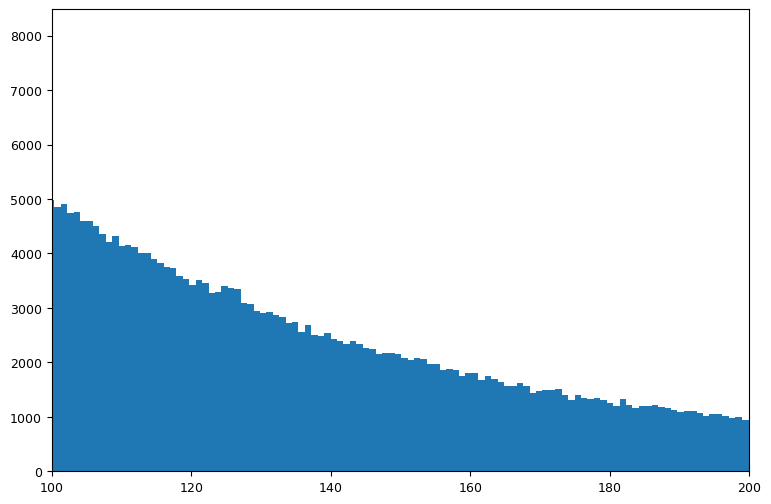

In [37]:
plt.hist(data['myy'] , bins = 3000)
plt.xlim(100, 200);

In [38]:
data.to_csv('data_2015_2018_sorted.csv', index = True)